* Following: http://www.cond-mat.de/teaching/DFT/qm1d.html
* 1D numeric Shrodinger equation solver, by discretisation to an Eigenvalue problem

$$f''(x_i) \approx (f(x_{i-1})-2*f(x_i)+f(x_{i+1}))/dx^2$$

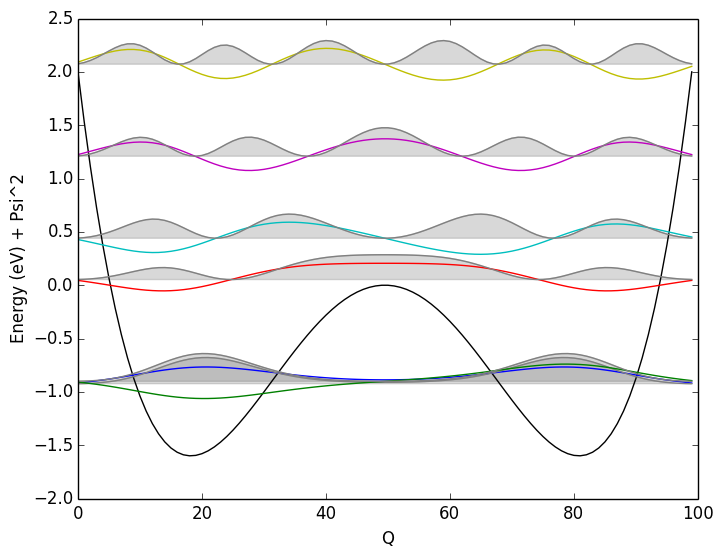

PyObject <matplotlib.text.Text object at 0x3273a3bd0>

In [74]:
# Following: http://www.cond-mat.de/teaching/DFT/qm1d.html
# 1D numeric Shrodinger equation solver, by discretisation to an Eigenvalue problem
#  $f''(x_i) \approx (f(x_{i-1})-2*f(x_i)+f(x_{i+1}))/dx^2$

using PyPlot

# Call as:
#  V() - anonymous function to generate potential energy
#  N - discretisation of TISH (and therefore size of matrix to diagonalise)
#  n - number of eigenenergies to plot
function TISH(V,N=99,n=3)
    plot([V(r) for r in -1.0:2/N:1.0],color="black")    # Potential energy curve
    
    dx=11/(N-1) # effectively a Kinetic-Energy term, deciding how closely spaced the energy levels
    
    # PE terms on the trace
    diagonal = [(2.0/dx^2 + V(r))::Float64 for r in -1.0:2/N:1.0]
    
    # KE terms on the tridiagonals
    updiagonal = [(-1/dx^2)::Float64 for r in 1:N]
    H =diagm(diagonal,0) + diagm(updiagonal,1) + diagm(updiagonal,-1)

    # And solve with dense eigensolvers
    evals,evec=eig(H)

    # This many eigenenergies
    for i in 1:n
        # Ψ ; the wavefunction, offset by the eigenvalue
        plot(evec[:,i]+evals[i])
        
        # Ψ^2 , the Prob. density, plotted grey, offset by the eigenvalues
        plot(10.*evec[:,i].^2+evals[i],color="grey")
        # Ψ^2, the prob density, filled curve in semi-tranparent grey, offset + to the eigenvalues
        fill_between(0:N,evals[i],evals[i]+10*evec[:,i].^2,color="grey",alpha=0.3)
    end
end

#V(r)=-3/abs(r) #- q^2/()   #... ish
#V(r)=1E-3*r^2  # Harmonic well
#V(r)=0 # infinite well pot.
#V(r)= 0.01*r^2+0.1*r  # an-Harmonic well


#TISH(r->r^2) # Harmonic well
#TISH(r->0) # Infinite well potential.
#TISH(r->3*r^2+r)
#TISH(r->-0.1/abs(r)) # Atom like - 1/r Coulomb potential
#TISH(r->20*r^2-20*abs(r),100,6) # Pretty crummy mexican hat
TISH(r->10*r^4-8*r^2,99,6) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability

xlabel("Q")
ylabel("Energy (eV) + Psi^2")

In [ ]:
plot(10.0*evec[:,1].^2)
plot(10.0*evec[:,2].^2)

# First two |Ψ|^2 summed
plot(10.0*evec[:,1].^2+10.0*evec[:,2].^2)